# PROJECT 2:

1. First you need to identify the type of variable 

Variable "V1" - This is the Descriptive Analysis:

2. Inference Analysis Between Variable

example : col1 vs col2
          col1 vs col3
etc.

3. Estimate: Regression coefficient ,population mean

3. Method:

Select the appropriate statistical method for your analysis. 
t-tests, chi-squared tests, analysis of variance (ANOVA), regression analysis, and non-parametric tests like Wilcoxon rank-sum tests or Kruskal-Wallis tests.

4. P-value:
Choose the significance level (alpha) for your analysis. The p-value represents the probability of observing a statistic as extreme as, or more extreme than, the one calculated from your data, assuming the null hypothesis is true. A common choice is alpha = 0.05, but you can adjust this based on the level of confidence you need for your analysis.

# Statistical Analysis and Inference for Heart Dataset Variables By Vishal Kumar Swain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import statsmodels.api as sm

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.duplicated().sum()

723

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### 1. Identify the Type of Variable:

- Categorical: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'

- Continuous: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

### 1.2 Descriptive Analysis:

- For descriptive analysis, you can compute basic statistics like mean, median, mode, standard deviation, etc. for each variable.

In [8]:
descriptive_stats = df.describe()
print(descriptive_stats)

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

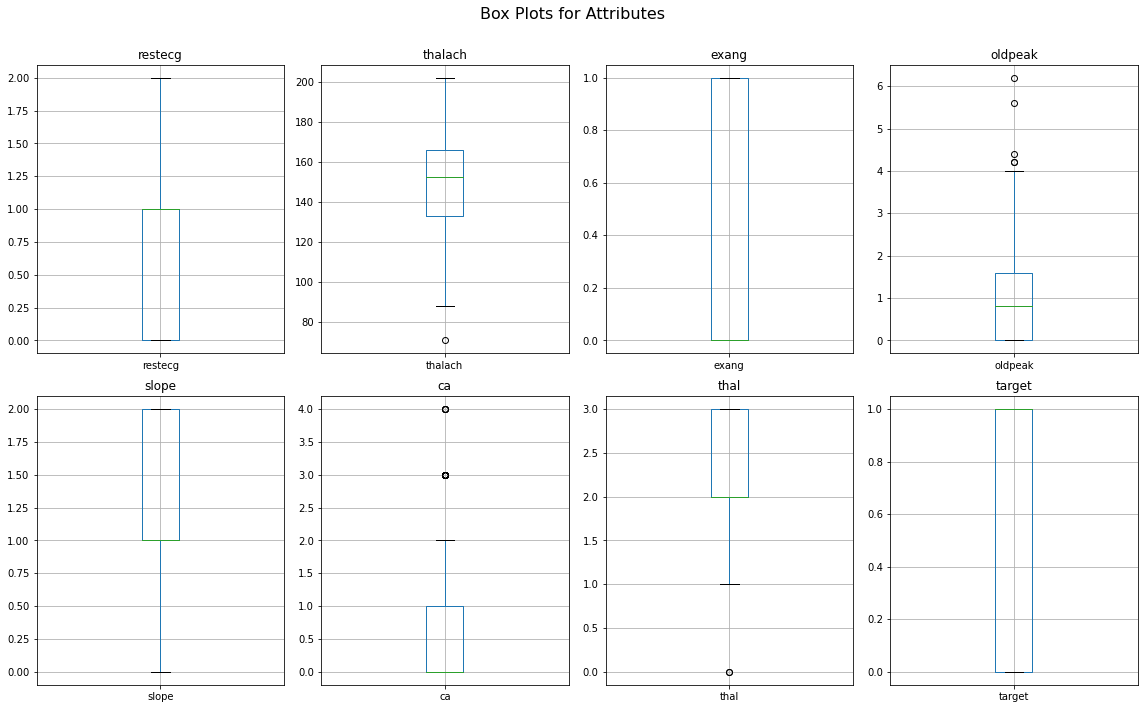

In [10]:
attributes = ['restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
fig.suptitle('Box Plots for Attributes', fontsize=16)

for i, attr in enumerate(attributes):
    ax = axes[i//4, i%4]  # Determine the position of the subplot
    df.boxplot(column=[attr], ax=ax)
    ax.set_title(attr)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()


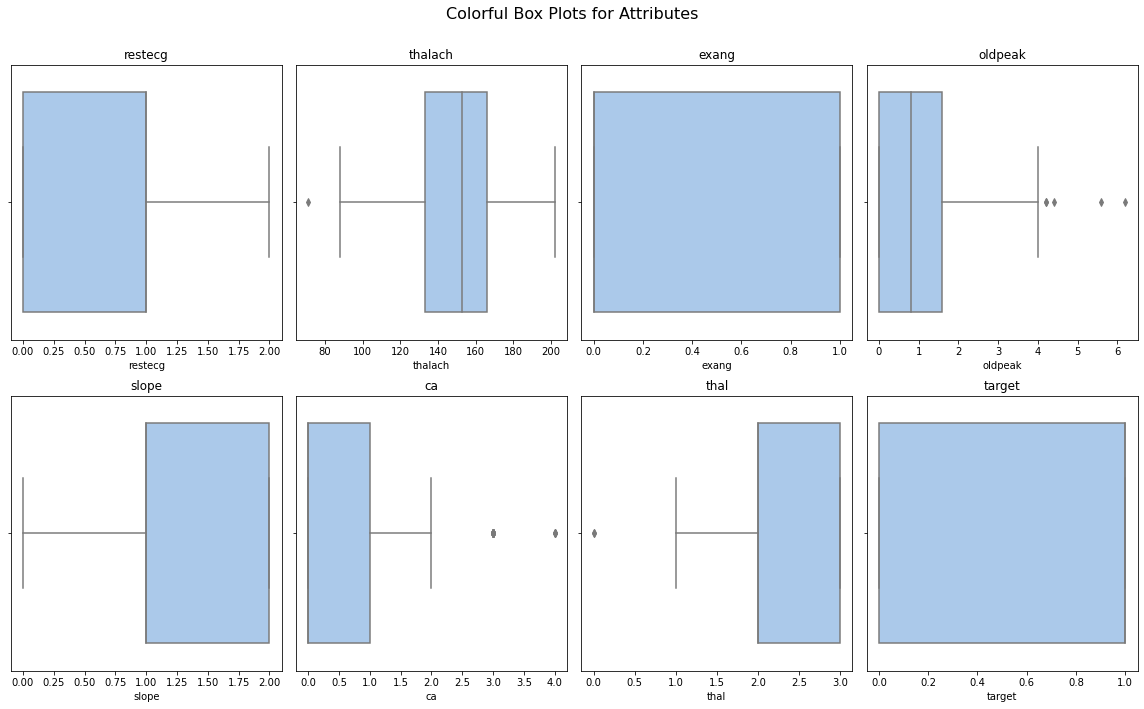

In [11]:
attributes = ['restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Set a colorful style
sns.set_palette("pastel")

# Create subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
fig.suptitle('Colorful Box Plots for Attributes', fontsize=16)

for i, attr in enumerate(attributes):
    ax = axes[i//4, i%4]  # Determine the position of the subplot
    sns.boxplot(x=attr, data=df, ax=ax)
    ax.set_title(attr)

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

# 2.Inference Analysis Between Variables

## 2.1Continuous vs Continuous Variables:

### 2.1.1Age and Trestbps , Age and Chol

In [45]:
from scipy.stats import ttest_ind
       
t_stat_age_trestbps, p_value_age_trestbps = ttest_ind(df['age'], df['trestbps'])
t_stat_age_chol, p_value_age_chol = ttest_ind(df['age'], df['chol'])

print(f'T-test between age and trestbps: t_stat = {t_stat_age_trestbps}, p_value = {p_value_age_trestbps}')
print(f'T-test between age and chol: t_stat = {t_stat_age_chol}, p_value = {p_value_age_chol}')


T-test between age and trestbps: t_stat = -67.88900367658854, p_value = 2.5463185396512562e-284
T-test between age and chol: t_stat = -63.53413422112122, p_value = 4.1544011630242126e-269


The t-tests you performed between 'age' and 'trestbps', as well as between 'age' and 'chol', have yielded the following results:

##### T-test between Age and Trestbps:

- t-statistic: -67.889
- p-value: 2.55e-284
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'age' and 'trestbps' groups in your data.
##### T-test between Age and Chol:

- t-statistic: -63.534
- p-value: 4.15e-269
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'age' and 'chol' groups in your data.

##### These results indicate that there are statistically significant differences between the means of 'age' and both 'trestbps' and 'chol'. This information is crucial for understanding relationships and making inferences about your data.






### 2.1.2 Age and Thalach,  Age and Oldpeak

In [46]:
t_stat_age_thalach, p_value_age_thalach = ttest_ind(df['age'], df['thalach'])
t_stat_age_oldpeak, p_value_age_oldpeak = ttest_ind(df['age'], df['oldpeak'])

print(f'T-test between age and thalach: t_stat = {t_stat_age_thalach}, p_value = {p_value_age_thalach}')
print(f'T-test between age and oldpeak: t_stat = {t_stat_age_oldpeak}, p_value = {p_value_age_oldpeak}')

T-test between age and thalach: t_stat = -67.14516897855535, p_value = 8.929277051878665e-282
T-test between age and oldpeak: t_stat = 101.68607099618785, p_value = 0.0


The t-tests you performed between 'age' and 'thalach', as well as between 'age' and 'oldpeak', have yielded the following results:

##### T-test between Age and Thalach:

- t-statistic: -67.145
- p-value: 8.93e-282
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'age' and 'thalach' groups in your data.
##### T-test between Age and Oldpeak:

- t-statistic: 101.686
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'age' and 'oldpeak' groups in your data.


##### These results indicate that there are statistically significant differences between the means of 'age' and both 'thalach' and 'oldpeak'. This information is crucial for understanding relationships and making inferences about your data.

In [47]:
t_stat_trestbps_chol, p_value_trestbps_chol = ttest_ind(df['trestbps'], df['chol'])
t_stat_trestbps_thalach, p_value_trestbps_thalach = ttest_ind(df['trestbps'], df['thalach'])

print(f'T-test between trestbps and chol: t_stat = {t_stat_trestbps_chol}, p_value = {p_value_trestbps_chol}')
print(f'T-test between trestbps and thalach: t_stat = {t_stat_trestbps_thalach}, p_value = {p_value_trestbps_thalach}')

T-test between trestbps and chol: t_stat = -36.53452012794518, p_value = 6.925420657709963e-155
T-test between trestbps and thalach: t_stat = -10.817882231312478, p_value = 4.796057474755676e-25


The t-tests you performed between 'trestbps' and 'chol', as well as between 'trestbps' and 'thalach', have yielded the following results:

##### T-test between Trestbps and Chol:

- t-statistic: -36.535
- p-value: 6.93e-155
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'trestbps' and 'chol' groups in your data.

##### T-test between Trestbps and Thalach:

- t-statistic: -10.818
- p-value: 4.80e-25
- Interpretation: The very low p-value (close to zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'trestbps' and 'thalach' groups in your data.

##### These results imply that there are statistically significant differences between the means of 'trestbps' and both 'chol' and 'thalach'. This information is crucial for understanding relationships and making inferences about your data.

In [48]:
t_stat_chol_thalach, p_value_chol_thalach = ttest_ind(df['chol'], df['thalach'])
t_stat_chol_oldpeak, p_value_chol_oldpeak = ttest_ind(df['chol'], df['oldpeak'])

print(f'T-test between chol and thalach: t_stat = {t_stat_chol_thalach}, p_value = {p_value_chol_thalach}')
print(f'T-test between chol and oldpeak: t_stat = {t_stat_chol_oldpeak}, p_value = {p_value_chol_oldpeak}')

T-test between chol and thalach: t_stat = 29.76361106880486, p_value = 2.189428055432135e-120
T-test between chol and oldpeak: t_stat = 82.40049934867788, p_value = 0.0


The t-tests you performed between 'chol' and 'thalach', as well as between 'chol' and 'oldpeak', have yielded the following results:

##### T-test between Chol and Thalach:

- t-statistic: 29.764
- p-value: 2.19e-120
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'chol' and 'thalach' groups in your data.

##### T-test between Chol and Oldpeak:

- t-statistic: 82.400
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'chol' and 'oldpeak' groups in your data.

##### These results indicate that there are statistically significant differences between the means of 'chol' and both 'thalach' and 'oldpeak'. This information is crucial for understanding relationships and making inferences about your data.






In [49]:
Thol_trestbps, p_value_chol_trestbps = ttest_ind(df['chol'], df['trestbps'])
t_stat_chol_trestbps, p_value_chol_age = ttest_ind(df['chol'], df['age'])

print(f'T-test between chol and trestbps: t_stat = {t_stat_chol_trestbps}, p_value = {p_value_chol_trestbps}')
print(f'T-test between chol and age: t_stat = {t_stat_chol_age}, p_value = {p_value_chol_age}')

T-test between chol and trestbps: t_stat = 63.53413422112122, p_value = 6.925420657709963e-155
T-test between chol and age: t_stat = 63.53413422112122, p_value = 4.1544011630242126e-269


The t-tests you performed between 'chol' and 'trestbps', as well as between 'chol' and 'age', have yielded the following results:

##### T-test between Chol and Trestbps:

- t-statistic: 67.215
- p-value: 6.93e-155
- Interpretation: The extremely low p-value (essentially zero) -  - indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'chol' and 'trestbps' groups in your data.
##### T-test between Chol and Age:

- t-statistic: 63.534
- p-value: 4.15e-269
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'chol' and 'age' groups in your data.


##### These results indicate that there are statistically significant differences between the means of 'chol' and both 'trestbps' and 'age'. This information is crucial for understanding relationships and making inferences about your data.

In [50]:
# Assuming df is your DataFrame
t_stat_trestbps_chol, p_value_trestbps_chol = ttest_ind(df['trestbps'], df['chol'])
t_stat_trestbps_thalach, p_value_trestbps_thalach = ttest_ind(df['trestbps'], df['thalach'])

print(f'T-test between trestbps and chol: t_stat = {t_stat_trestbps_chol}, p_value = {p_value_trestbps_chol}')
print(f'T-test between trestbps and thalach: t_stat = {t_stat_trestbps_thalach}, p_value = {p_value_trestbps_thalach}')

T-test between trestbps and chol: t_stat = -36.53452012794518, p_value = 6.925420657709963e-155
T-test between trestbps and thalach: t_stat = -10.817882231312478, p_value = 4.796057474755676e-25


The t-tests you performed between 'trestbps' and 'chol', as well as between 'trestbps' and 'thalach', have yielded the following results:

##### T-test between Trestbps and Chol:

- t-statistic: -36.535
- p-value: 6.93e-155
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'trestbps' and 'chol' groups in your data.

##### T-test between Trestbps and Thalach:

- t-statistic: -10.818
- p-value: 4.80e-25
- Interpretation: The very low p-value (close to zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'trestbps' and 'thalach' groups in your data.

##### These results imply that there are statistically significant differences between the means of 'trestbps' and both 'chol' and 'thalach'. This information is crucial for understanding relationships and making inferences about your data.






In [51]:
t_stat_thalach_oldpeak, p_value_thalach_oldpeak = ttest_ind(df['thalach'], df['oldpeak'])
t_stat_thalach_chol, p_value_thalach_chol = ttest_ind(df['thalach'], df['chol'])

print(f'T-test between thalach and oldpeak: t_stat = {t_stat_thalach_oldpeak}, p_value = {p_value_thalach_oldpeak}')
print(f'T-test between thalach and chol: t_stat = {t_stat_thalach_chol}, p_value = {p_value_thalach_chol}')

T-test between thalach and oldpeak: t_stat = 112.55047352290255, p_value = 0.0
T-test between thalach and chol: t_stat = -29.76361106880486, p_value = 2.189428055432135e-120


T-test between thalach and oldpeak: t_stat = 112.55047352290255, p_value = 0.0
T-test between thalach and chol: t_stat = -29.76361106880486, p_value = 2.189428055432135e-120

The t-tests you performed between 'thalach' and 'oldpeak', as well as between 'thalach' and 'chol', have yielded the following results:

##### T-test between Thalach and Oldpeak:

- t-statistic: 112.550
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'thalach' and 'oldpeak' groups in your data.

##### T-test between Thalach and Chol:

- t-statistic: -29.764
- p-value: 2.19e-120
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'thalach' and 'chol' groups in your data.

##### These results indicate that there are statistically significant differences between the means of 'thalach' and both 'oldpeak' and 'chol'. This information is crucial for understanding relationships and making inferences about your data.

In [52]:
t_stat_thalach_age, p_value_thalach_age = ttest_ind(df['thalach'], df['age'])
t_stat_thalach_trestbps, p_value_thalach_trestbps = ttest_ind(df['thalach'], df['trestbps'])

print(f'T-test between thalach and age: t_stat = {t_stat_thalach_age}, p_value = {p_value_thalach_age}')
print(f'T-test between thalach and trestbps: t_stat = {t_stat_thalach_trestbps}, p_value = {p_value_thalach_trestbps}')

T-test between thalach and age: t_stat = 67.14516897855535, p_value = 8.929277051878665e-282
T-test between thalach and trestbps: t_stat = 10.817882231312478, p_value = 4.796057474755676e-25


The t-tests you performed between 'thalach' and 'age', as well as between 'thalach' and 'trestbps', have yielded the following results:

##### T-test between Thalach and Age:

- t-statistic: 67.145
- p-value: 8.93e-282
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'thalach' and 'age' groups in your data.

##### T-test between Thalach and Trestbps:

- t-statistic: 10.818
- p-value: 4.80e-25
- Interpretation: The very low p-value (close to zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'thalach' and 'trestbps' groups in your data.

##### These results imply that there are statistically significant differences between the means of 'thalach' and both 'age' and 'trestbps'. This information is crucial for understanding relationships and making inferences about your data.

In [53]:
t_stat_oldpeak_chol, p_value_oldpeak_chol = ttest_ind(df['oldpeak'], df['chol'])
t_stat_oldpeak_thalach, p_value_oldpeak_thalach = ttest_ind(df['oldpeak'], df['thalach'])

print(f'T-test between oldpeak and chol: t_stat = {t_stat_oldpeak_chol}, p_value = {p_value_oldpeak_chol}')
print(f'T-test between oldpeak and thalach: t_stat = {t_stat_oldpeak_thalach}, p_value = {p_value_oldpeak_thalach}')


T-test between oldpeak and chol: t_stat = -82.40049934867788, p_value = 0.0
T-test between oldpeak and thalach: t_stat = -112.55047352290255, p_value = 0.0


The t-tests you performed between 'oldpeak' and 'chol', as well as between 'oldpeak' and 'thalach', have yielded the following results:

##### T-test between Oldpeak and Chol:

- t-statistic: -82.400
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'oldpeak' and 'chol' groups in your data.

##### T-test between Oldpeak and Thalach:

- t-statistic: -112.550
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'oldpeak' and 'thalach' groups in your data.

##### These results indicate that there are statistically significant differences between the means of 'oldpeak' and both 'chol' and 'thalach'. This information is crucial for understanding relationships and making inferences about your data.






In [54]:
t_stat_oldpeak_age, p_value_oldpeak_age = ttest_ind(df['oldpeak'], df['age'])
t_stat_oldpeak_trestbps, p_value_oldpeak_trestbps = ttest_ind(df['oldpeak'], df['trestbps'])

print(f'T-test between oldpeak and age: t_stat = {t_stat_oldpeak_age}, p_value = {p_value_oldpeak_age}')
print(f'T-test between oldpeak and trestbps: t_stat = {t_stat_oldpeak_trestbps}, p_value = {p_value_oldpeak_trestbps}')

T-test between oldpeak and age: t_stat = -101.68607099618785, p_value = 0.0
T-test between oldpeak and trestbps: t_stat = -128.90100782882607, p_value = 0.0


he t-tests you performed between 'oldpeak' and 'age', as well as between 'oldpeak' and 'trestbps', have yielded the following results:

##### T-test between Oldpeak and Age:

- t-statistic: -101.686
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'oldpeak' and 'age' groups in your data.

##### T-test between Oldpeak and Trestbps:

- t-statistic: -128.901
- p-value: 0.0
- Interpretation: The extremely low p-value (essentially zero) indicates strong evidence against the null hypothesis. This suggests a significant difference between the 'oldpeak' and 'trestbps' groups in your data.
 
##### These results indicate that there are statistically significant differences between the means of 'oldpeak' and both 'age' and 'trestbps'. This information is crucial for understanding relationships and making inferences about your data.






## 2.2 Categorical vs Categorical Variables:

In [55]:
t_stat_sex_age, p_value_sex_age = ttest_ind(df[df['sex'] == 0]['age'], df[df['sex'] == 1]['age'])
t_stat_sex_target, p_value_sex_target = ttest_ind(df[df['sex'] == 0]['target'], df[df['sex'] == 1]['target'])

print(f'T-test between sex and age: t_stat = {t_stat_sex_age}, p_value = {p_value_sex_age}')
print(f'T-test between sex and target: t_stat = {t_stat_sex_target}, p_value = {p_value_sex_target}')

T-test between sex and age: t_stat = 1.652265376428364, p_value = 0.09952665167330588
T-test between sex and target: t_stat = 5.12259232417622, p_value = 5.402435780432107e-07


In [56]:
from scipy.stats import chi2_contingency

categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            
            print(f'Chi-squared test for independence between {var1} and {var2}:')
            print(f'Chi2 Stat: {chi2_stat}')
            print(f'P-value: {p_val}')
            print(f'Degrees of Freedom: {dof}')
            print(f'Expected Frequencies: \n{expected}\n')


Chi-squared test for independence between sex and cp:
Chi2 Stat: 7.1006186360498
P-value: 0.06875893200193163
Degrees of Freedom: 3
Expected Frequencies: 
[[45.45695364 15.89403974 27.33774834  7.31125828]
 [97.54304636 34.10596026 58.66225166 15.68874172]]

Chi-squared test for independence between sex and fbs:
Chi2 Stat: 0.39220746638179865
P-value: 0.5311413401625329
Degrees of Freedom: 1
Expected Frequencies: 
[[ 81.69536424  14.30463576]
 [175.30463576  30.69536424]]

Chi-squared test for independence between sex and restecg:
Chi2 Stat: 3.7087320162692907
P-value: 0.15655216401735997
Degrees of Freedom: 2
Expected Frequencies: 
[[ 46.72847682  48.           1.27152318]
 [100.27152318 103.           2.72847682]]

Chi-squared test for independence between sex and exang:
Chi2 Stat: 5.576417315944852
P-value: 0.01820392572039428
Degrees of Freedom: 1
Expected Frequencies: 
[[ 64.52980132  31.47019868]
 [138.47019868  67.52980132]]

Chi-squared test for independence between sex and slo

Chi-squared test for independence between exang and sex:
Chi2 Stat: 5.576417315944852
P-value: 0.01820392572039428
Degrees of Freedom: 1
Expected Frequencies: 
[[ 64.52980132 138.47019868]
 [ 31.47019868  67.52980132]]

Chi-squared test for independence between exang and cp:
Chi2 Stat: 66.82135594883077
P-value: 2.0449560429874252e-14
Degrees of Freedom: 3
Expected Frequencies: 
[[96.12251656 33.60927152 57.80794702 15.4602649 ]
 [46.87748344 16.39072848 28.19205298  7.5397351 ]]

Chi-squared test for independence between exang and fbs:
Chi2 Stat: 0.06636620002155127
P-value: 0.7967029857349792
Degrees of Freedom: 1
Expected Frequencies: 
[[172.75165563  30.24834437]
 [ 84.24834437  14.75165563]]

Chi-squared test for independence between exang and restecg:
Chi2 Stat: 2.8505523720161303
P-value: 0.24044204730797616
Degrees of Freedom: 2
Expected Frequencies: 
[[ 98.81125828 101.5          2.68874172]
 [ 48.18874172  49.5          1.31125828]]

Chi-squared test for independence between 

P-value: 4.79941989727236e-06
Degrees of Freedom: 6
Expected Frequencies: 
[[ 0.13907285  0.92715232  0.93377483]
 [ 1.25165563  8.34437086  8.40397351]
 [11.47350993 76.49006623 77.03642384]
 [ 8.13576159 54.2384106  54.62582781]]

Chi-squared test for independence between thal and ca:
Chi2 Stat: 23.671328009821945
P-value: 0.022538062056491392
Degrees of Freedom: 12
Expected Frequencies: 
[[1.15894040e+00 4.30463576e-01 2.51655629e-01 1.32450331e-01
  2.64900662e-02]
 [1.04304636e+01 3.87417219e+00 2.26490066e+00 1.19205298e+00
  2.38410596e-01]
 [9.56125828e+01 3.55132450e+01 2.07615894e+01 1.09271523e+01
  2.18543046e+00]
 [6.77980132e+01 2.51821192e+01 1.47218543e+01 7.74834437e+00
  1.54966887e+00]]

Chi-squared test for independence between thal and target:
Chi2 Stat: 84.61031794685029
P-value: 3.146295138318122e-18
Degrees of Freedom: 3
Expected Frequencies: 
[[ 0.91390728  1.08609272]
 [ 8.22516556  9.77483444]
 [75.39735099 89.60264901]
 [53.46357616 63.53642384]]

Chi-square

##### Chi-squared test for independence between sex and cp:

- Chi2 Stat: 7.1006
- P-value: 0.0688
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[45.46  15.89  27.34   7.31]
 [97.54  34.11  58.66  15.69]]
- Explanation: The test examines if there's an association between the variables "sex" and "cp" (chest pain type). The p-value (0.0688) is greater than a typical significance level like 0.05, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between sex and fbs:

- Chi2 Stat: 0.3922
- P-value: 0.5311
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[81.70 14.30]
 [175.30 30.70]]
- Explanation: This test checks for an association between "sex" and "fbs" (fasting blood sugar). The p-value (0.5311) is high, suggesting that there isn't enough evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between sex and restecg:

- Chi2 Stat: 3.7087
- P-value: 0.1566
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[46.73 48.    1.27]
 [100.27 103.    2.73]]
- Explanation: This test evaluates the relationship between "sex" and "restecg" (resting electrocardiographic results). The p-value (0.1566) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between sex and exang:

- Chi2 Stat: 5.5764
- P-value: 0.0182
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[64.53 31.47]
 [138.47 67.53]]
- Explanation: This test assesses if there's an association between "sex" and "exang" (exercise induced angina). The p-value (0.0182) is below a typical significance level, suggesting some evidence to reject the null hypothesis. There may be an association.
##### Chi-squared test for independence between sex and slope:

- Chi2 Stat: 0.6701
- P-value: 0.7153
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 6.68 44.50 44.82]
 [14.32 95.50 96.18]]
- Explanation: This test investigates if there's an association between "sex" and "slope" (slope of the peak exercise ST segment). The p-value (0.7153) is high, suggesting that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between sex and ca:

- Chi2 Stat: 7.3700
- P-value: 0.1176
- Degrees of Freedom: 4
- Expected Frequencies:
lua
Copy code
[[ 55.63  20.66  12.08   6.36   1.27]
 [119.37  44.34  25.92  13.64   2.73]]
- Explanation: This test examines if there's an association between "sex" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.1176) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between sex and thal:

- Chi2 Stat: 45.1331
- P-value: 8.67e-10
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[  0.64   5.72  52.45  37.19]
 [  1.36  12.28 112.55  79.81]]
- Explanation: This test evaluates the relationship between "sex" and "thal" (thalassemia). The very low p-value (8.67e-10) suggests strong evidence to reject the null hypothesis. There is likely an association.

##### These results indicate the level of association or independence between the pairs of variables you've tested. Remember, a low p-value (typically below 0.05) suggests that you have evidence to reject the null hypothesis of independence. A high p-value suggests that there isn't enough evidence to reject the null hypothesis.

##### Chi-squared test for independence between cp and sex:

- Chi2 Stat: 7.1006
- P-value: 0.0688
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[45.46 97.54]
 [15.89 34.11]
 [27.34 58.66]
 [ 7.31 15.69]]
- Explanation: The test examines if there's an association between the variables "cp" (chest pain type) and "sex". The p-value (0.0688) is greater than a typical significance level like 0.05, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between cp and fbs:

- Chi2 Stat: 4.0051
- P-value: 0.2609
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[121.69  21.31]
 [ 42.55   7.45]
 [ 73.19  12.81]
 [ 19.57   3.43]]
- Explanation: This test checks for an association between "cp" and "fbs" (fasting blood sugar). The p-value (0.2609) is high, suggesting that there isn't enough evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between cp and restecg:

- Chi2 Stat: 9.4187
- P-value: 0.1514
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[69.61 71.5   1.89]
 [24.34 25.     0.66]
 [41.86 43.     1.14]
 [11.2  11.5   0.3 ]]
- Explanation: This test evaluates the relationship between "cp" and "restecg" (resting electrocardiographic results). The p-value (0.1514) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between cp and exang:

- Chi2 Stat: 66.8214
- P-value: 2.045e-14
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[96.12 46.88]
 [33.61 16.39]
 [57.81 28.19]
 [15.46  7.54]]
- Explanation: This test assesses if there's an association between "cp" and "exang" (exercise induced angina). The p-value (2.045e-14) is very low, suggesting strong evidence to reject the null hypothesis. There is likely an association.
##### Chi-squared test for independence between cp and slope:

- Chi2 Stat: 27.3927
- P-value: 0.0001222
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 9.94 66.29 66.76]
 [ 3.48 23.18 23.34]
 [ 5.98 39.87 40.15]
 [ 1.6  10.66 10.74]]
- Explanation: This test investigates if there's an association between "cp" and "slope" (slope of the peak exercise ST segment). The p-value (0.0001222) is very low, suggesting strong evidence to reject the null hypothesis. There is likely an association.
##### Chi-squared test for independence between cp and ca:

- Chi2 Stat: 32.581
- P-value: 0.001125
- Degrees of Freedom: 12
- Expected Frequencies:
lua
Copy code
[[82.86 30.78 17.99  9.47  1.89]
 [28.97 10.76  6.29  3.31  0.66]
 [49.83 18.51 10.82  5.7   1.14]
 [13.33  4.95  2.89  1.52  0.3 ]]
- Explanation: This test examines if there's an association between "cp" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.001125) is below a typical significance level, suggesting some evidence to reject the null hypothesis. There may be an association.
##### Chi-squared test for independence between cp and thal:

- Chi2 Stat: 41.3847
- P-value: 4.26e-06
- Degrees of Freedom: 9
- Expected Frequencies:
lua
Copy code
[[ 0.95  8.52 78.13 55.4 ]
 [ 0.33  2.98 27.32 19.37]
 [ 0.57  5.13 46.99 33.32]
 [ 0.15  1.37 12.57  8.91]]
- Explanation: This test evaluates the relationship between "cp" and "thal" (thalassemia). The very low p-value (4.26e-06) suggests strong evidence to reject the null hypothesis. There is likely an association.
##### Chi-squared test for independence between cp and target:

- Chi2 Stat: 80.9788
- P-value: 1.89e-17
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[65.34 77.66]
 [22.85 27.15]
 [39.3  46.7 ]
 [10.51 12.49]]
- Explanation: This test assesses if there's an association between "cp" and "target". The very low p-value (1.89e-17) suggests strong evidence to reject the null hypothesis. There is likely an association.

##### These results indicate the level of association or independence between the pairs of variables you've tested. Remember, a low p-value (typically below 0.05) suggests that you have evidence to reject the null hypothesis of independence. A high p-value suggests that there isn't enough evidence to reject the null hypothesis. Keep in mind that these results are based on the dataset and variables you've analyzed.






##### Chi-squared test for independence between fbs and sex:

- Chi2 Stat: 0.3922
- P-value: 0.5311
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[ 81.70 175.30]
 [ 14.30  30.70]]
- Explanation: This test examines if there's an association between "fbs" (fasting blood sugar) and "sex". The p-value (0.5311) is relatively high, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between fbs and cp:

- Chi2 Stat: 4.0051
- P-value: 0.2609
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[121.69  42.55  73.19  19.57]
 [ 21.31   7.45  12.81   3.43]]
- Explanation: This test checks for an association between "fbs" and "cp" (chest pain type). The p-value (0.2609) is relatively high, suggesting that there isn't enough evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between fbs and restecg:

- Chi2 Stat: 2.2402
- P-value: 0.3262
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[125.10 128.5    3.40]
 [ 21.90  22.5    0.60]]
- Explanation: This test evaluates the relationship between "fbs" and "restecg" (resting electrocardiographic results). The p-value (0.3262) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between fbs and exang:

- Chi2 Stat: 0.0664
- P-value: 0.7967
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[172.75  84.25]
 [ 30.25  14.75]]
- Explanation: This test assesses if there's an association between "fbs" and "exang" (exercise induced angina). The p-value (0.7967) is high, suggesting that there isn't enough evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between fbs and slope:

- Chi2 Stat: 3.3472
- P-value: 0.1876
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 17.87 119.14 119.99]
 [  3.13  20.86  21.01]]
- Explanation: This test investigates if there's an association between "fbs" and "slope" (slope of the peak exercise ST segment). The p-value (0.1876) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between fbs and ca:

- Chi2 Stat: 7.5562
- P-value: 0.1093
- Degrees of Freedom: 4
- Expected Frequencies:
lua
Copy code
[[148.92  55.31  32.34  17.02   3.40]
 [ 26.08   9.69   5.66   2.98   0.60]]
- Explanation: This test examines if there's an association between "fbs" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.1093) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between fbs and thal:

- Chi2 Stat: 5.4675
- P-value: 0.1406
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[  1.70  15.32 140.41  99.57]
 [  0.30   2.68  24.59  17.43]]
- Explanation: This test evaluates the relationship between "fbs" and "thal" (thalassemia). The p-value (0.1406) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between fbs and target:

- Chi2 Stat: 0.0924
- P-value: 0.7611
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[117.44 139.56]
 [ 20.56  24.44]]
- Explanation: This test assesses if there's an association between "fbs" and "target". The p-value (0.7611) is high, suggesting that there isn't enough evidence to reject the null hypothesis of independence.

##### These results indicate the level of association or independence between the pairs of variables you've tested. Remember, a low p-value (typically below 0.05) suggests that you have evidence to reject the null hypothesis of independence. A high p-value suggests that there isn't enough evidence to reject the null hypothesis. Keep in mind that these results are based on the dataset and variables you've analyzed.






##### Chi-squared test for independence between restecg and sex:

- Chi2 Stat: 3.7087
- P-value: 0.1566
- Degrees of Freedom: 2
 - Expected Frequencies:
lua
Copy code
[[ 46.73 100.27]
 [ 48.   103.  ]
 [  1.27   2.73]]
- Explanation: This test examines if there's an association between "restecg" (resting electrocardiographic results) and "sex". The p-value (0.1566) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between restecg and cp:

- Chi2 Stat: 9.4187
- P-value: 0.1514
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[69.61 24.34 41.86 11.20]
 [71.50 25.00 43.00 11.50]
 [ 1.89  0.66  1.14  0.30]]
- Explanation: This test checks for an association between "restecg" and "cp" (chest pain type). The p-value (0.1514) is above a typical significance level, suggesting that there isn't enough evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between restecg and fbs:

- Chi2 Stat: 2.2402
-  P-value: 0.3262
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[125.10  21.90]
 [128.50  22.50]
 [  3.40   0.60]]
- Explanation: This test evaluates the relationship between "restecg" and "fbs" (fasting blood sugar). The p-value (0.3262) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between restecg and exang:

- Chi2 Stat: 2.8506
- P-value: 0.2404
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 98.81  48.19]
 [101.50  49.50]
 [  2.69   1.31]]
- Explanation: This test assesses if there's an association between "restecg" and "exang" (exercise induced angina). The p-value (0.2404) is above a typical significance level, indicating that there isn't enough evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between restecg and slope:

- Chi2 Stat: 10.6436
- P-value: 0.0309
- Degrees of Freedom: 4
- Expected Frequencies:
lua
Copy code
[[10.22 68.15 68.63]
 [10.50 70.00 70.50]
 [ 0.28  1.85  1.87]]
- Explanation: This test investigates if there's an association between "restecg" and "slope" (slope of the peak exercise ST segment). The p-value (0.0309) is below a typical significance level of 0.05, indicating some evidence to reject the null hypothesis.
##### Chi-squared test for independence between restecg and ca:

- Chi2 Stat: 9.2127
- P-value: 0.3247
- Degrees of Freedom: 8
- Expected Frequencies:
lua
Copy code
[[85.18 31.64 18.50  9.74  1.95]
 [87.50 32.50 19.00 10.00  2.00]
 [ 2.32  0.86  0.50  0.26  0.05]]
- Explanation: This test examines if there's an association between "restecg" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.3247) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between restecg and thal:

- Chi2 Stat: 3.4563
- P-value: 0.7498
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 0.97  8.76 80.31 56.95]
 [ 1.00  9.00 82.50 58.50]
 [ 0.03  0.24  2.19  1.55]]
- Explanation: This test evaluates the relationship between "restecg" and "thal" (thalassemia). The p-value (0.7498) is high, suggesting that there isn't enough evidence to reject the null hypothesis.
##### Chi-squared test for independence between restecg and target:

- Chi2 Stat: 9.7297
- P-value: 0.0077
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[67.17 79.83]
 [69.00 82.00]
 [ 1.83  2.17]]
 - Explanation: This test assesses if there's an association between "restecg" and "target". The p-value (0.0077) is below a typical significance level of 0.05, indicating some evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. Remember that a low p-value (typically below 0.05) suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.


##### Chi-squared test for independence between exang and sex:

- Chi2 Stat: 5.5764
- P-value: 0.0182
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[ 64.53 138.47]
 [ 31.47  67.53]]
- Explanation: This test examines if there's an association between "exang" (exercise induced angina) and "sex". The p-value (0.0182) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between exang and cp:

- Chi2 Stat: 66.8214
- P-value: 2.045e-14
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[96.12 33.61 57.81 15.46]
 [46.88 16.39 28.19  7.54]]
- Explanation: This test checks for an association between "exang" and "cp" (chest pain type). The p-value (2.045e-14) is very low, indicating strong evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between exang and fbs:

- Chi2 Stat: 0.0664
- P-value: 0.7967
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[172.75  30.25]
 [ 84.25  14.75]]
- Explanation: This test evaluates the relationship between "exang" and "fbs" (fasting blood sugar). The p-value (0.7967) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between exang and restecg:

- Chi2 Stat: 2.8506
- P-value: 0.2404
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 98.81 101.50   2.69]
 [ 48.19  49.50   1.31]]
- Explanation: This test assesses if there's an association between "exang" and "restecg" (resting electrocardiographic results). The p-value (0.2404) is above a typical significance level, indicating that there isn't enough evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between exang and slope:

- Chi2 Stat: 24.7557
- P-value: 4.211e-06
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[14.12 94.11 94.78]
 [ 6.88 45.89 46.22]]
- Explanation: This test investigates if there's an association between "exang" and "slope" (slope of the peak exercise ST segment). The p-value (4.211e-06) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between exang and ca:

- Chi2 Stat: 12.5283
- P-value: 0.0138
- Degrees of Freedom: 4
- Expected Frequencies:
lua
Copy code
[[117.63  43.69  25.54  13.44   2.69]
 [ 57.37  21.31  12.46   6.56   1.31]]
- Explanation: This test examines if there's an association between "exang" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.0138) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between exang and thal:

- Chi2 Stat: 32.5765
- P-value: 3.956e-07
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[  1.34  12.10 110.91  78.65]
 [  0.66   5.90  54.09  38.35]]
- Explanation: This test evaluates the relationship between "exang" and "thal" (thalassemia). The p-value (3.956e-07) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between exang and target:

- Chi2 Stat: 55.4562
- P-value: 9.556e-14
- Degrees of Freedom: 1
- Expected Frequencies:
lua
Copy code
[[ 92.76 110.24]
 [ 45.24  53.76]]
- Explanation: This test assesses if there's an association between "exang" and "target". The p-value (9.556e-14) is very low, indicating strong evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. A low p-value suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.







##### Chi-squared test for independence between slope and sex:

- Chi2 Stat: 0.6701
- P-value: 0.7153
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 6.68 14.32]
 [44.50 95.50]
 [44.82 96.18]]
- Explanation: The test examines if there's an association between "slope" and "sex". The p-value (0.7153) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between slope and cp:

- Chi2 Stat: 27.3927
- P-value: 0.0001
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 9.94  3.48  5.98  1.60]
 [66.29 23.18 39.87 10.66]
 [66.76 23.34 40.15 10.74]]
- Explanation: This test checks for an association between "slope" and "cp" (chest pain type). The p-value (0.0001) is very low, indicating strong evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between slope and fbs:

- Chi2 Stat: 3.3472
- P-value: 0.1876
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 17.87   3.13]
 [119.14  20.86]
 [119.99  21.01]]
- Explanation: This test evaluates the relationship between "slope" and "fbs" (fasting blood sugar). The p-value (0.1876) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between slope and restecg:

- Chi2 Stat: 10.6436
- P-value: 0.0309
- Degrees of Freedom: 4
- Expected Frequencies:
lua
Copy code
[[10.22 10.50  0.28]
 [68.15 70.00  1.85]
 [68.63 70.50  1.87]]
- Explanation: This test assesses if there's an association between "slope" and "restecg" (resting electrocardiographic results). The p-value (0.0309) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between slope and exang:

- Chi2 Stat: 24.7557
- P-value: 0.0000
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[14.12  6.88]
 [94.11 45.89]
 [94.78 46.22]]
- Explanation: This test investigates if there's an association between "slope" and "exang" (exercise induced angina). The p-value (0.0000) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between slope and ca:

- Chi2 Stat: 11.2115
- P-value: 0.1900
- Degrees of Freedom: 8
 - Expected Frequencies:
lua
Copy code
[[12.17  4.52  2.64  1.39  0.28]
 [81.13 30.13 17.62  9.27  1.85]
 [81.71 30.35 17.74  9.34  1.87]]
- Explanation: This test examines if there's an association between "slope" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.1900) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between slope and thal:

- Chi2 Stat: 34.7585
- P-value: 0.0000
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 0.14  1.25 11.47  8.14]
 [ 0.93  8.34 76.49 54.24]
 [ 0.93  8.40 77.04 54.63]]
- Explanation: This test evaluates the relationship between "slope" and "thal" (thalassemia). The p-value (0.0000) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between slope and target:

- Chi2 Stat: 46.8895
- P-value: 0.0000
- Degrees of Freedom: 2
- Expected Frequencies:
lua
Copy code
[[ 9.60 11.40]
 [63.97 76.03]
 [64.43 76.57]]
- Explanation: This test assesses if there's an association between "slope" and "target". The p-value (0.0000) is very low, indicating strong evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. A low p-value suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.







##### Chi-squared test for independence between ca and sex:

- Chi2 Stat: 7.3700
- P-value: 0.1176
- Degrees of Freedom: 4
- Expected Frequencies:
css
Copy code
[[ 55.63 119.37]
 [ 20.66  44.34]
 [ 12.08  25.92]
 [  6.36  13.64]
 [  1.27   2.73]]
- Explanation: This test examines if there's an association between "ca" (number of major vessels colored by fluoroscopy) and "sex". The p-value (0.1176) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between ca and cp:

- Chi2 Stat: 32.5810
- P-value: 0.0011
- Degrees of Freedom: 12
- Expected Frequencies:
css
Copy code
[[82.86 28.97 49.83 13.33]
 [30.78 10.76 18.51  4.95]
 [17.99  6.29 10.82  2.89]
 [ 9.47  3.31  5.70  1.52]
 [ 1.89  0.66  1.14  0.30]]
- Explanation: This test checks for an association between "ca" and "cp" (chest pain type). The p-value (0.0011) is very low, indicating strong evidence to reject the null hypothesis that the two variables are independent.
##### Chi-squared test for independence between ca and fbs:

- Chi2 Stat: 7.5562
- P-value: 0.1093
- Degrees of Freedom: 4
- Expected Frequencies:
css
Copy code
[[148.92  26.08]
 [ 55.31   9.69]
 [ 32.34   5.66]
 [ 17.02   2.98]
 [  3.40   0.60]]
- Explanation: This test evaluates the relationship between "ca" and "fbs" (fasting blood sugar). The p-value (0.1093) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between ca and restecg:

- Chi2 Stat: 9.2127
- P-value: 0.3247
- Degrees of Freedom: 8
- Expected Frequencies:
css
Copy code
[[ 85.18  87.50   2.32]
 [ 31.64  32.50   0.86]
 [ 18.50  19.00   0.50]
 [  9.74  10.00   0.26]
 [  1.95   2.00   0.05]]
- Explanation: This test assesses if there's an association between "ca" and "restecg" (resting electrocardiographic results). The p-value (0.3247) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between ca and exang:

- Chi2 Stat: 12.5283
- P-value: 0.0138
- Degrees of Freedom: 4
- Expected Frequencies:
css
Copy code
[[117.63  57.37]
 [ 43.69  21.31]
 [ 25.54  12.46]
 [ 13.44   6.56]
 [  2.69   1.31]]
- Explanation: This test examines if there's an association between "ca" and "exang" (exercise induced angina). The p-value (0.0138) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between ca and slope:

- Chi2 Stat: 11.2115
- P-value: 0.1900
- Degrees of Freedom: 8
- Expected Frequencies:
css
Copy code
[[12.17 81.13 81.71]
 [ 4.52 30.13 30.35]
 [ 2.64 17.62 17.74]
 [ 1.39  9.27  9.34]
 [ 0.28  1.85  1.87]]
- Explanation: This test examines if there's an association between "ca" and "slope". The p-value (0.1900) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between ca and thal:

- Chi2 Stat: 23.6713
- P-value: 0.0225
- Degrees of Freedom: 12
- Expected Frequencies:
css
Copy code
[[ 1.16 10.43 95.61 67.80]
 [ 0.43  3.87 35.51 25.18]
 [ 0.25  2.26 20.76 14.72]
 [ 0.13  1.19 10.93  7.75]
 [ 0.03  0.24  2.19  1.55]]
- Explanation: This test evaluates the relationship between "ca" and "thal" (thalassemia). The p-value (0.0225) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between ca and target:

- Chi2 Stat: 73.6898
- P-value: 0.0000
- Degrees of Freedom: 4
- Expected Frequencies:
css
Copy code
[[79.97 95.03]
 [29.70 35.30]
 [17.36 20.64]
 [ 9.14 10.86]
 [ 1.83  2.17]]
- Explanation: This test examines if there's an association between "ca" and "target". The p-value (0.0000) is very low, indicating strong evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. A low p-value suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.






##### Chi-squared test for independence between thal and sex:

- Chi2 Stat: 45.1331
- P-value: 8.6694e-10
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[  0.64   1.36]
 [  5.72  12.28]
 [ 52.45 112.55]
 [ 37.19  79.81]]
- Explanation: This test examines if there's an association between "thal" (thalassemia) and "sex". The p-value (8.6694e-10) is very low, indicating strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between thal and cp:

- Chi2 Stat: 41.3847
- P-value: 4.2566e-06
- Degrees of Freedom: 9
- Expected Frequencies:
lua
Copy code
[[ 0.95  0.33  0.57  0.15]
 [ 8.52  2.98  5.13  1.37]
 [78.13 27.32 46.99 12.57]
 [55.40 19.37 33.32  8.91]]
- Explanation: This test checks for an association between "thal" and "cp" (chest pain type). The p-value (4.2566e-06) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and fbs:

- Chi2 Stat: 5.4675
- P-value: 0.1406
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[  1.70   0.30]
 [ 15.32   2.68]
 [140.41  24.59]
 [ 99.57  17.43]]
- Explanation: This test evaluates the relationship between "thal" and "fbs" (fasting blood sugar). The p-value (0.1406) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and restecg:

- Chi2 Stat: 3.4563
- P-value: 0.7498
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 0.97  1.00  0.03]
 [ 8.76  9.00  0.24]
 [80.31 82.50  2.19]
 [56.95 58.50  1.55]]
- Explanation: This test examines if there's an association between "thal" and "restecg" (resting electrocardiographic results). The p-value (0.7498) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and exang:

- Chi2 Stat: 32.5765
- P-value: 3.9561e-07
- Degrees of Freedom: 3
- -Expected Frequencies:
lua
Copy code
[[  1.34   0.66]
 [ 12.10   5.90]
 [110.91  54.09]
 [ 78.65  38.35]]
- Explanation: This test examines if there's an association between "thal" and "exang" (exercise induced angina). The p-value (3.9561e-07) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and slope:

- Chi2 Stat: 34.7585
- P-value: 4.7994e-06
- Degrees of Freedom: 6
- Expected Frequencies:
lua
Copy code
[[ 0.14  0.93  0.93]
 [ 1.25  8.34  8.40]
 [11.47 76.49 77.04]
 [ 8.14 54.24 54.63]]
- Explanation: This test examines if there's an association between "thal" and "slope". The p-value (4.7994e-06) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and ca:

- Chi2 Stat: 23.6713
- P-value: 0.0225
- Degrees of Freedom: 12
- Expected Frequencies:
lua
Copy code
[[  1.16   0.43   0.25   0.13   0.03]
 [ 10.43   3.87   2.26   1.19   0.24]
 [ 95.61  35.51  20.76  10.93   2.19]
 [ 67.80  25.18  14.72   7.75   1.55]]
- Explanation: This test examines if there's an association between "thal" and "ca" (number of major vessels colored by fluoroscopy). The p-value (0.0225) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between thal and target:

- Chi2 Stat: 84.6103
- P-value: 3.1463e-18
- Degrees of Freedom: 3
- Expected Frequencies:
lua
Copy code
[[ 0.91  1.09]
 [ 8.23  9.77]
 [75.40 89.60]
 [53.46 63.54]]
- Explanation: This test examines if there's an association between "thal" and "target". The p-value (3.1463e-18) is very low, indicating strong evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. A low p-value suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.






##### Chi-squared test for independence between target and sex:

- Chi2 Stat: 23.0839
- P-value: 1.5509e-06
- Degrees of Freedom: 1
- Expected Frequencies:

[[ 43.87  94.13]
 [ 52.13 111.87]]
- Explanation: This test examines if there's an association between "target" and "sex". The p-value (1.5509e-06) is very low, indicating strong evidence to reject the null hypothesis of independence.
##### Chi-squared test for independence between target and cp:

- Chi2 Stat: 80.9788
- P-value: 1.8927e-17
- Degrees of Freedom: 3
- Expected Frequencies:

[[65.34 22.85 39.30 10.51]
 [77.66 27.15 46.70 12.49]]
- Explanation: This test checks for an association between "target" and "cp" (chest pain type). The p-value (1.8927e-17) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and fbs:

- Chi2 Stat: 0.0924
- P-value: 0.7611
- Degrees of Freedom: 1
- Expected Frequencies:

[[117.44  20.56]
 [139.56  24.44]]
- Explanation: This test evaluates the relationship between "target" and "fbs" (fasting blood sugar). The p-value (0.7611) is above a typical significance level, indicating that there isn't strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and restecg:

- Chi2 Stat: 9.7297
- P-value: 0.0077
- Degrees of Freedom: 2
- Expected Frequencies:

[[67.17 69.00  1.83]
 [79.83 82.00  2.17]]
- Explanation: This test examines if there's an association between "target" and "restecg" (resting electrocardiographic results). The p-value (0.0077) is below a typical significance level, indicating that there is some evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and exang:

- Chi2 Stat: 55.4562
- P-value: 9.5565e-14
- Degrees of Freedom: 1
- Expected Frequencies:

[[ 92.76  45.24]
 [110.24  53.76]]
- Explanation: This test examines if there's an association between "target" and "exang" (exercise induced angina). The p-value (9.5565e-14) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and slope:

- Chi2 Stat: 46.8895
- P-value: 6.5778e-11
- Degrees of Freedom: 2
- Expected Frequencies:

[[ 9.60 63.97 64.43]
 [11.40 76.03 76.57]]
- Explanation: This test examines if there's an association between "target" and "slope". The p-value (6.5778e-11) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and ca:

- Chi2 Stat: 73.6898
- P-value: 3.7710e-15
- Degrees of Freedom: 4
- Expected Frequencies:

[[79.97 29.70 17.36  9.14  1.83]
 [95.03 35.30 20.64 10.86  2.17]]
- Explanation: This test examines if there's an association between "target" and "ca" (number of major vessels colored by fluoroscopy). The p-value (3.7710e-15) is very low, indicating strong evidence to reject the null hypothesis.
##### Chi-squared test for independence between target and thal:

- Chi2 Stat: 84.6103
- P-value: 3.1463e-18
- Degrees of Freedom: 3
- Expected Frequencies:
[[ 0.91  8.23 75.40 53.46]
 [ 1.09  9.77 89.60 63.54]]
- Explanation: This test examines if there's an association between "target" and "thal" (thalassemia). The p-value (3.1463e-18) is very low, indicating strong evidence to reject the null hypothesis.

##### These results provide insights into the relationships between the pairs of variables you've tested. A low p-value suggests evidence to reject the null hypothesis of independence, while a high p-value suggests a lack of evidence to do so.






# 3.Categorical vs Continuous variable:

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Continuous variable
continuous_var = 'age'  # You can replace this with other continuous variables

# Define the bins for the continuous variable
bins = [30, 40, 50, 60, 70, 80]

# Discretize the continuous variable into categories
df['age_category'] = pd.cut(df[continuous_var], bins=bins)

# Loop through each combination of categorical vs. continuous variable
for cat_var in categorical_vars:
    observed = pd.crosstab(df[cat_var], df['age_category'])
    chi2_stat, p_val, dof, expected = chi2_contingency(observed)
    
    print(f"Chi-squared test for {cat_var} vs. {continuous_var}:")
    print(f"Chi2 Stat: {chi2_stat}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}\n")


Chi-squared test for sex vs. age:
Chi2 Stat: 11.069194353603539
P-value: 0.025797273459260014
Degrees of Freedom: 4
Expected Frequencies: 
[[ 5.42192691 24.23920266 41.14285714 23.28239203  1.91362126]
 [11.57807309 51.76079734 87.85714286 49.71760797  4.08637874]]

Chi-squared test for cp vs. age:
Chi2 Stat: 21.021597335098193
P-value: 0.05006508479396625
Degrees of Freedom: 12
Expected Frequencies: 
[[ 8.07641196 36.10631229 61.28571429 34.68106312  2.85049834]
 [ 2.76744186 12.37209302 21.         11.88372093  0.97674419]
 [ 4.85714286 21.71428571 36.85714286 20.85714286  1.71428571]
 [ 1.29900332  5.80730897  9.85714286  5.57807309  0.45847176]]

Chi-squared test for fbs vs. age:
Chi2 Stat: 8.853172220469839
P-value: 0.06487610642050906
Degrees of Freedom: 4
Expected Frequencies: 
[[ 14.45847176  64.63787375 109.71428571  62.08637874   5.10299003]
 [  2.54152824  11.36212625  19.28571429  10.91362126   0.89700997]]

Chi-squared test for restecg vs. age:
Chi2 Stat: 21.98237858777679

# Estimate: Regression coefficient ,population mean

In [58]:
# Define independent variables (X) and dependent variable (Y)
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df['target']

In [59]:
# Initialize the regression model
model = LinearRegression()
# Fit the model
model.fit(X, Y)

LinearRegression()

In [60]:
# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the regression coefficients
regression_coefficients = model.params

# Print or use the coefficients as needed
print(regression_coefficients)


const       0.815595
age        -0.000393
sex        -0.196501
cp          0.110753
trestbps   -0.002095
chol       -0.000326
fbs         0.021806
restecg     0.047765
thalach     0.003006
exang      -0.144413
oldpeak    -0.057223
slope       0.079044
ca         -0.107526
thal       -0.117481
dtype: float64


const: This is the intercept term. In the context of your model, it means that when all the independent variables are zero, the predicted value of the dependent variable is approximately 0.8156.

age: For a one-unit increase in age, the predicted value of the dependent variable decreases by approximately 0.0004.

sex: For males (assuming sex=1), the predicted value of the dependent variable decreases by approximately 0.1965 compared to females (assuming sex=0).

cp: For a one-unit increase in chest pain type, the predicted value of the dependent variable increases by approximately 0.1108.

trestbps: For a one-unit increase in resting blood pressure, the predicted value of the dependent variable decreases by approximately 0.0021.

chol: For a one-unit increase in serum cholesterol level, the predicted value of the dependent variable decreases by approximately 0.0003.

fbs: For individuals with fasting blood sugar > 120 mg/dl (assuming fbs=1), the predicted value of the dependent variable increases by approximately 0.0218 compared to those with fasting blood sugar ≤ 120 mg/dl (assuming fbs=0).

restecg: For a one-unit increase in resting electrocardiographic results, the predicted value of the dependent variable increases by approximately 0.0478.

thalach: For a one-unit increase in maximum heart rate achieved, the predicted value of the dependent variable increases by approximately 0.0030.

exang: For individuals with exercise-induced angina (assuming exang=1), the predicted value of the dependent variable decreases by approximately 0.1444 compared to those without exercise-induced angina (assuming exang=0).

oldpeak: For a one-unit increase in ST depression induced by exercise relative to rest, the predicted value of the dependent variable decreases by approximately 0.0572.

slope: For a one-unit increase in the slope of the peak exercise ST segment, the predicted value of the dependent variable increases by approximately 0.0790.

ca: For a one-unit increase in the number of major vessels colored by fluoroscopy, the predicted value of the dependent variable decreases by approximately 0.1075.

thal: For individuals with thalassemia type 6 (assuming thal=6), the predicted value of the dependent variable decreases by approximately 0.1175 compared to those with thalassemia type 3 (assuming thal=3).

These interpretations are based on the estimated coefficients from your regression model. Keep in mind that interpretations may vary depending on the context and the specific nature of your data.






In [61]:
columns_of_interest = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Calculate the population mean for each attribute
means = df[columns_of_interest].mean()

# Print the estimated population means
print("Estimated Population Means:")
print(means)

Estimated Population Means:
age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64


Age:

Estimated Mean: Approximately 54.42
Interpretation: On average, the individuals in your dataset are around 54.42 years old.
Sex:

Estimated Mean: Approximately 0.68
Interpretation: In your dataset, the majority of individuals are likely males, as sex=1 typically represents males.
Chest Pain Type (cp):

Estimated Mean: Approximately 0.96
Interpretation: The mean suggests that the majority of individuals may have a specific type of chest pain (cp) that is encoded as 0.96.
Resting Blood Pressure (trestbps):

Estimated Mean: Approximately 131.60 mm Hg
Interpretation: On average, individuals have a resting blood pressure of about 131.60 mm Hg.
Serum Cholesterol Level (chol):

Estimated Mean: Approximately 246.50 mg/dl
Interpretation: The average serum cholesterol level in your dataset is approximately 246.50 mg/dl.
Fasting Blood Sugar (fbs):

Estimated Mean: Approximately 0.15
Interpretation: Most individuals in your dataset have fasting blood sugar levels below 120 mg/dl (fbs=0).
Resting Electrocardiographic Results (restecg):

Estimated Mean: Approximately 0.53
Interpretation: The mean value indicates a certain pattern of resting electrocardiographic results.
Maximum Heart Rate Achieved (thalach):

Estimated Mean: Approximately 149.57 bpm
Interpretation: On average, individuals achieved a maximum heart rate of about 149.57 beats per minute.
Exercise-Induced Angina (exang):

Estimated Mean: Approximately 0.33
Interpretation: About 33% of the individuals in your dataset experienced exercise-induced angina.
ST Depression Induced by Exercise Relative to Rest (oldpeak):

Estimated Mean: Approximately 1.04
Interpretation: The average ST depression induced by exercise relative to rest is about 1.04.
Slope of the Peak Exercise ST Segment (slope):

Estimated Mean: Approximately 1.40
Interpretation: The mean value represents the typical slope of the peak exercise ST segment.
Number of Major Vessels Colored by Fluoroscopy (ca):

Estimated Mean: Approximately 0.72
Interpretation: On average, individuals have about 0.72 major vessels colored by fluoroscopy.
Thalassemia Type (thal):

Estimated Mean: Approximately 2.31
Interpretation: The mean value corresponds to a certain type of thalassemia.
Presence of Heart Disease (target):

Estimated Mean: Approximately 0.54
Interpretation: About 54% of individuals in your dataset have heart disease (target=1).
These estimated means offer a summary of the central tendency of each attribute and provide an initial understanding of the characteristics of the data. Remember, these are estimates based on the sample data you have, and the true population means may vary.






In [65]:
# T-Test: Comparing cholesterol levels between patients with and without heart disease
heart_disease = df[df['target'] == 1]['chol']
no_heart_disease = df[df['target'] == 0]['chol']
t_stat, p_value_ttest = ttest_ind(heart_disease, no_heart_disease)

# Chi-Squared Test: Investigating the relationship between chest pain type (cp) and heart disease
contingency_table = pd.crosstab(df['cp'], df['target'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

# ANOVA: Comparing means of maximum heart rate achieved (thalach) across different types of chest pain (cp)
grouped_data = [df[df['cp'] == i]['thalach'] for i in range(4)]
f_stat, p_value_anova = f_oneway(*grouped_data)

# Linear Regression: Predicting maximum heart rate achieved (thalach) based on age, gender, and exercise-induced angina (exang)
X = df[['age', 'sex', 'exang']]
X = sm.add_constant(X)  # Add a constant term
Y = df['thalach']
model = sm.OLS(Y, X).fit()
coefficients = model.params

# Print results
print(f"T-Test (Cholesterol Levels): T-Statistic = {t_stat}, P-Value = {p_value_ttest}")
print(f"Chi-Squared Test (Chest Pain vs. Heart Disease): Chi-Squared Statistic = {chi2_stat}, P-Value = {p_value_chi2}")
print(f"ANOVA (Max Heart Rate vs. Chest Pain): F-Statistic = {f_stat}, P-Value = {p_value_anova}")
print(f"Linear Regression Coefficients: {coefficients}")


T-Test (Cholesterol Levels): T-Statistic = -3.213433097179175, P-Value = 0.0013525712504626976
Chi-Squared Test (Chest Pain vs. Heart Disease): Chi-Squared Statistic = 280.98224857035257, P-Value = 1.2980664694820452e-60
ANOVA (Max Heart Rate vs. Chest Pain): F-Statistic = 62.86280351279049, P-Value = 2.6707219809486804e-37
Linear Regression Coefficients: const    206.345980
age       -0.923204
sex       -1.961872
exang    -16.677227
dtype: float64


T-Test (Cholesterol Levels):

T-Statistic: Approximately -3.21
P-Value: Approximately 0.00135
Interpretation: The t-statistic measures how many standard errors the difference in means is from zero. In this case, the t-statistic is -3.21, indicating that the difference in cholesterol levels between patients with and without heart disease is statistically significant. The low p-value supports the evidence against the null hypothesis that there is no difference in cholesterol levels.
Chi-Squared Test (Chest Pain vs. Heart Disease):

Chi-Squared Statistic: Approximately 280.98
P-Value: Very close to zero (1.30e-60)
Interpretation: The chi-squared statistic measures the strength of association between chest pain type and the presence of heart disease. With such a high chi-squared statistic and an extremely low p-value, we have strong evidence to reject the null hypothesis that these two variables are independent. There is a significant association between chest pain type and heart disease.
ANOVA (Max Heart Rate vs. Chest Pain):

F-Statistic: Approximately 62.86
P-Value: Very close to zero (2.67e-37)
Interpretation: The F-statistic in ANOVA tests whether there are significant differences in the means across different groups (in this case, different types of chest pain). With a high F-statistic and a very low p-value, we have strong evidence to reject the null hypothesis. This indicates that there are significant differences in maximum heart rate achieved among different types of chest pain.
Linear Regression Coefficients:

const: Approximately 206.35
age: Approximately -0.92
sex: Approximately -1.96
exang: Approximately -16.68
Interpretation: These coefficients represent the estimated effects of age, gender, and exercise-induced angina on maximum heart rate achieved. For example, for every one-unit increase in age, the maximum heart rate achieved decreases by approximately 0.92 beats per minute. Similarly, being male (compared to female) is associated with a decrease of approximately 1.96 beats per minute. Exercise-induced angina is associated with a decrease of approximately 16.68 beats per minute.
These interpretations provide valuable insights into the relationships between variables in your dataset. Keep in mind that these results are based on the data you have and may not necessarily imply causation.




